# 1) Image Smoothing
# 2) Edge Detection
# 3) Template Matching

## Importing Libraries

In [1]:
import numpy as np
from PIL import Image, ImageDraw
import math
import matplotlib.pyplot as plt
import matplotlib.image as Image
import collections
import cv2
import math

## Functions

In [2]:
def image_smoothing(image,kernelSize) :
    for row in range(image.shape[0] - 1):
         for col in range(image.shape[1] - 1):
                  image[row+1,col+1] = np.mean(image[row:row+kernelSize,col:col+kernelSize])

    return(image)


# Question 1 : Image Smoothing

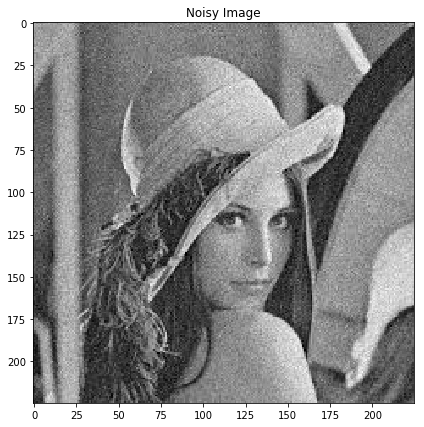

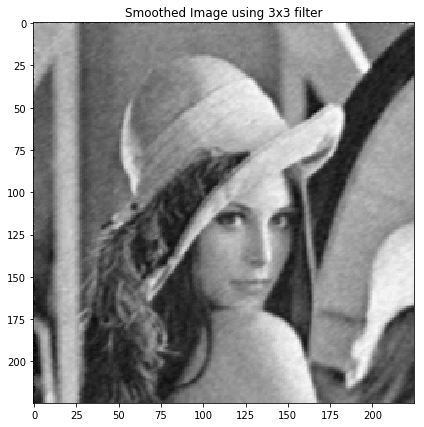

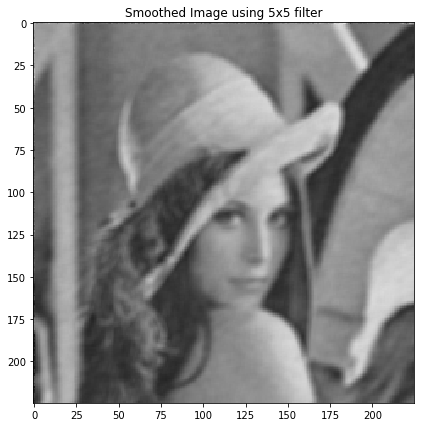

In [3]:
#Read and Display Image
img3x3 = cv2.imread("question1.jpg",0)
f = plt.figure(figsize=(7,7))
plt.title("Noisy Image")
plt.imshow(img3x3,cmap = plt.get_cmap('gray'))
plt.show()

#output Image after Smoothing
f = plt.figure(figsize=(7,7))
op3x3 = image_smoothing(img3x3,3)
plt.title("Smoothed Image using 3x3 filter")
plt.imshow(op3x3,cmap = plt.get_cmap('gray'))
plt.show()

# #Read and Display Image
img5x5 = cv2.imread("question1.jpg")
#output Image after Smoothing
op5x5 = image_smoothing(img5x5,5)
f = plt.figure(figsize=(7,7))
plt.title("Smoothed Image using 5x5 filter")
plt.imshow(op5x5,cmap = plt.get_cmap('gray'))
plt.show()

# Question 2 : Edge Detection

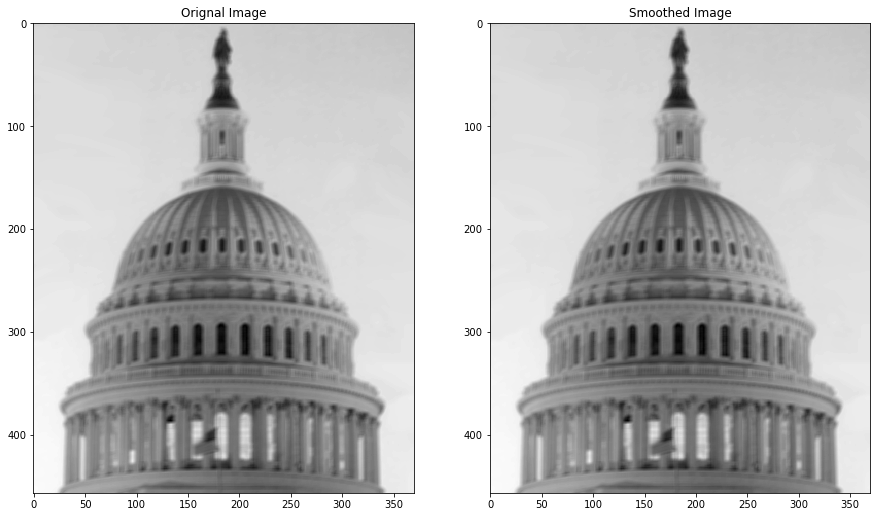

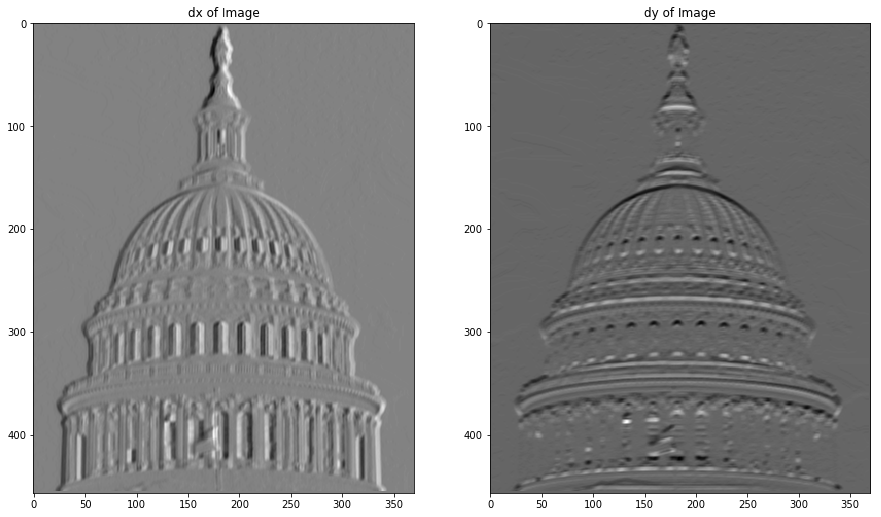

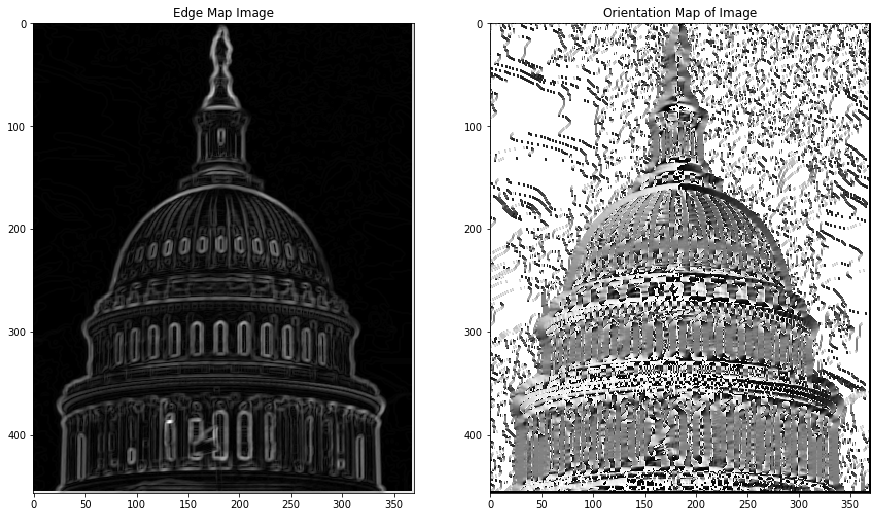

In [4]:
#Input Image for Smoothing
imgSobel = cv2.imread("capitol.jpg",0)
# #Output Image after Smoothing
image = image_smoothing(imgSobel,5)

#Plot Both Images
f = plt.figure(figsize=(15,15))
f.add_subplot(1,2, 1)
plt.title('Orignal Image')
plt.imshow(imgSobel,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2, 2)
plt.title('Smoothed Image')
plt.imshow(image,cmap = plt.get_cmap('gray'))
plt.show()
        
#Initializing Matrices with zeros
ImageGxGy = np.zeros(shape=(image.shape[0],image.shape[1]))
ImageGx = np.zeros(shape=(image.shape[0],image.shape[1]))
ImageGy = np.zeros(shape=(image.shape[0],image.shape[1]))
Tan = np.zeros(shape=(image.shape[0],image.shape[1]))

#Sobel Edge Detection Algorithm:

for rowSize in range(len(image)-2):
    for colSize in range(len(image[0])-2):
            #Sobel mask for x-direction:
            #multiplying only with the non zero values, as the matrices are already initialised with zeros
            
            Gy= ( (2*image [ rowSize+2,colSize+1 ]+image [ rowSize+2,colSize ]+image [ rowSize+2,colSize+2 ] )- (2*image [rowSize,colSize+1 ]+image [rowSize,colSize ]+image [rowSize,colSize+2 ] ) );
            #Sobel mask for y-direimagetion:
            Gx= ( (2*image [ rowSize+1,colSize+2 ]+image [ rowSize,colSize+2 ]+image [ rowSize+2,colSize+2 ] )- (2*image [rowSize+1,colSize ]+image [rowSize,colSize ]+image [rowSize+2,colSize ] ) );
            
            ImageGx[rowSize][colSize] = Gx
            ImageGy[rowSize][colSize] = Gy
            image[rowSize,colSize]= math.pow((Gx**2+Gy**2),0.5)
            #handling Tan values for 0 and negative and mapping into grey scale image
            Tan[rowSize][colSize] = ((math.degrees(math.atan(Gy/Gx)) + 90) *255/180) if Gx != 0 else 255
            
              
                
#ploting all 6 images
f = plt.figure(figsize=(15,15))
f.add_subplot(1,2, 1)
plt.title('dx of Image')
plt.imshow(ImageGx,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2, 2)
plt.title('dy of Image')
plt.imshow(ImageGy,cmap = plt.get_cmap('gray'))
plt.show()
        

f = plt.figure(figsize=(15,15))
f.add_subplot(1,2, 1)
plt.title('Edge Map Image')
plt.imshow(image,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2, 2)
plt.title("Orientation Map of Image")
plt.imshow(Tan,cmap = plt.get_cmap('gray'))
plt.show()


# Question 3 : Template Matching

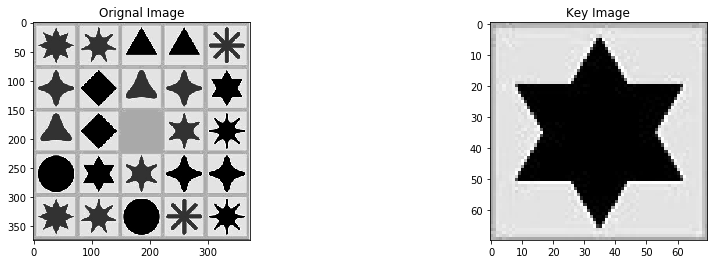

In [5]:
orignalImage = cv2.imread("shapes-bw.jpg",0)
keyImage = cv2.imread("shape4.jpg",0)

f = plt.figure(figsize=(15,4))
f.add_subplot(1,2, 1)
plt.title('Orignal Image')
plt.imshow(orignalImage,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2, 2)
plt.title("Key Image")
plt.imshow(keyImage,cmap = plt.get_cmap('gray'))
plt.show()


In [6]:
#take mean of kernel
meanKey = np.mean(keyImage)
#subtract it from each element
subMeanKey = np.subtract(keyImage,meanKey)

imageFinal = np.zeros(shape=(len(orignalImage)-len(keyImage),len(orignalImage[0])-len(keyImage[0])))
for row in range(len(orignalImage)-len(keyImage)):
    for col in range(len(orignalImage[0])-len(keyImage[0])):
        meanOfFilter = np.mean(orignalImage[row:row+len(keyImage),col:col+len(keyImage[0])])
        subMatrix = np.subtract(orignalImage[row:row+len(keyImage),col:col+len(keyImage[0])],meanOfFilter)
        imageFinalTeamp= np.sum(np.multiply(subMatrix,subMeanKey))
        imageFinal[row,col] = np.divide(imageFinalTeamp,(math.pow(np.sum(np.square(subMatrix)), 0.5)*math.pow(np.sum(np.square(subMeanKey)), 0.5)))
            
        

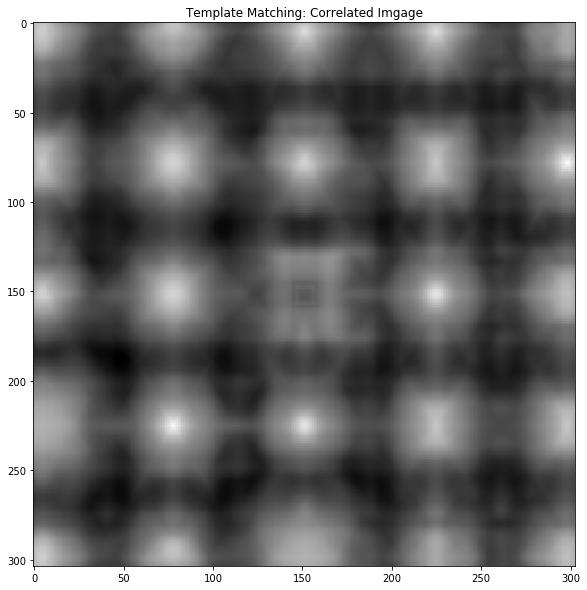

In [7]:
corrImage = np.multiply(imageFinal,255)
corrImage.astype(int)
#Ploting Template Matching
f = plt.figure(figsize=(10,10))
plt.title("Template Matching: Correlated Imgage")
plt.imshow(corrImage, cmap = plt.get_cmap('gray'))
plt.show()

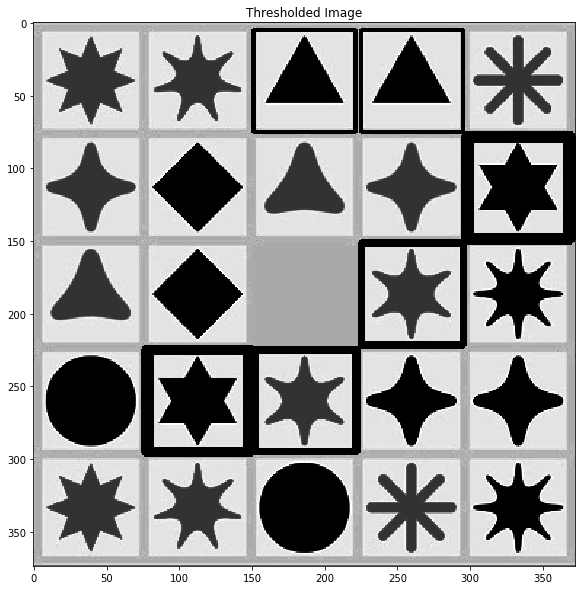

In [8]:

TempImage=orignalImage.copy()
locIntensity = np.where( corrImage >= 0.8*255) 
 
# Draw a rectangle around the matched region.
for point in zip(*locIntensity[::-1]):
    cv2.rectangle(TempImage, point, (point[0] + keyImage.shape[1], point[1] + keyImage.shape[0]), (0,255,255), 2)
#Show the final image with the matched area.
f = plt.figure(figsize=(10,10))
plt.title('Thresholded Image')

plt.imshow(TempImage, cmap = plt.get_cmap('gray'))
plt.show()


In [16]:
#laplacian filter
lapImageCorr = corrImage.copy()
lapImage=image_smoothing(lapImageCorr,3)
LapPos = np.zeros(shape=(corrImage.shape[0],corrImage.shape[1]))
Tan = np.zeros(shape=(corrImage.shape[0],corrImage.shape[1]))

# Laplacian Filter Masks are as follows:
# Positive Mask=[[0, -1, 0],[-1, 4, -1],[ 0, -1, 0]]

#we will be using positive mask here

for rowSize in range(len(lapImage)-2):
    for colSize in range(len(lapImage[0])-2):
            posMask= ( (4*lapImage [rowSize+1,colSize+1] )- (lapImage [ rowSize,colSize+1 ]+ lapImage [ rowSize+1,colSize ] +lapImage [rowSize+2,colSize+1 ]+lapImage [rowSize+1,colSize+2 ]));
            LapPos[rowSize][colSize] = posMask
            
#subtracting the mask from the image            
filterImg = lapImage.copy()
posMaskImage = filterImg - LapPos
           

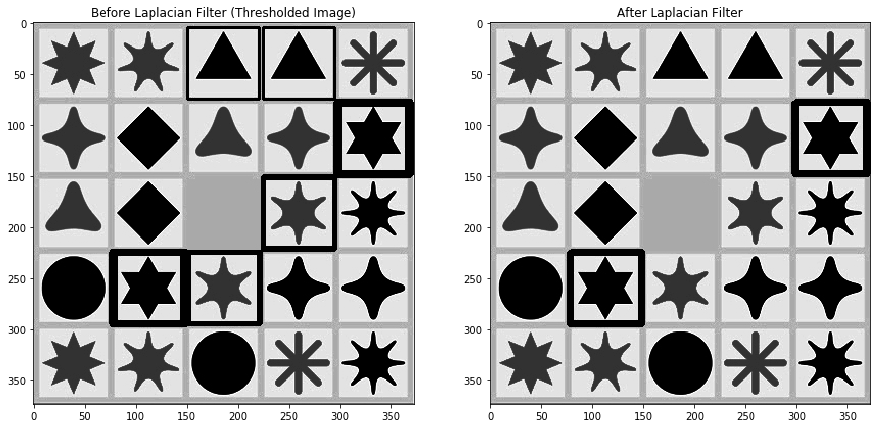

In [17]:
locationImage = orignalImage.copy()
#Taking the treshold Value as 0.8 heuristically
loc = np.where(posMaskImage>=0.8*255) 
for point in zip(*loc[::-1]):
    cv2.rectangle(locationImage, point, (point[0] + keyImage.shape[1], point[1] + keyImage.shape[0]), (0,255,255), 2)
    
# f = plt.figure()
f = plt.figure(figsize=(15,15))
f.add_subplot(1,2, 1)
plt.title('Before Laplacian Filter (Thresholded Image)')
plt.imshow(TempImage,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2, 2)
plt.title("After Laplacian Filter")
plt.imshow(locationImage,cmap = plt.get_cmap('gray'))
plt.show()
